Kode ini berfungsi untuk memproses dan menampilkan citra dengan bantuan tiga library utama: `numpy` untuk operasi numerik dan manipulasi array, `matplotlib.pyplot` untuk menampilkan citra dalam bentuk grafik, serta `cv2` dari OpenCV yang digunakan untuk membaca atau memodifikasi citra. Biasanya, kombinasi ketiga library ini dimanfaatkan dalam proyek-proyek pengolahan citra digital karena memberikan fleksibilitas dalam analisis data visual secara efisien.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Fungsi `bgr2gray` digunakan untuk mengubah citra berwarna dengan format BGR menjadi citra grayscale secara manual. Fungsi ini mengambil setiap piksel dari citra, kemudian menghitung nilai intensitas abu-abunya berdasarkan rumus konversi standar dengan bobot 0.2989 untuk komponen merah, 0.5870 untuk hijau, dan 0.1140 untuk biru. Proses ini dilakukan secara iteratif untuk setiap piksel, lalu hasilnya disimpan dalam array dua dimensi bertipe `uint8` yang merepresentasikan citra hitam-putih.


In [2]:
def bgr2gray(image):
    tinggi, lebar = image.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*image[i][j][2] + 0.5870*image[i][j][1] + 0.1140*image[i][j][0])

    return grayImg

Baris pertama membaca file citra `'Assets/adudu.jpg'` dan menyimpannya dalam variabel `image` menggunakan `matplotlib.pyplot.imread`, yang biasanya mengembalikan array RGB. Baris kedua memanggil fungsi `bgr2gray` yang sebelumnya didefinisikan untuk mengubah citra berwarna tersebut menjadi grayscale dan menyimpannya ke dalam variabel `grayImage`. Perlu dicatat bahwa jika `imread` dari `matplotlib` digunakan, format warnanya adalah RGB, sehingga urutan warna harus disesuaikan jika fungsi mengasumsikan BGR seperti pada `OpenCV`.


In [3]:
image = plt.imread('Assets/adudu.jpg')
grayImage = bgr2gray(image)

Fungsi `mode` digunakan untuk mencari nilai modus (nilai yang paling sering muncul) dari sebuah array. Pertama, array diurutkan agar nilai-nilai yang sama berurutan, lalu fungsi menghitung frekuensi kemunculan setiap elemen. Nilai dengan frekuensi tertinggi disimpan dalam `sorted_modus`. Setelah itu, dilakukan pengecekan ulang terhadap array asli untuk menyaring nilai-nilai yang termasuk modus namun tetap menjaga urutan aslinya dan menghindari duplikasi. Hasil akhirnya adalah daftar semua nilai modus dari array tersebut.


In [4]:
def mode(array):
    sorted_arr = np.sort(array)
    freq = 1
    max_freq = 0
    sorted_modus = []
    modus = []
    curr_num = None

    for i in range(len(array)):
        if i == 0:
            curr_num = sorted_arr[i]
        else:
            if sorted_arr[i] == curr_num:
                freq += 1
            else:
                freq = 1
                curr_num = sorted_arr[i]

        if freq > max_freq:
            max_freq = freq
            sorted_modus = [sorted_arr[i]]
        elif freq == max_freq:
            sorted_modus.append(sorted_arr[i])

    for i in range(len(array)):
        if array[i] in sorted_modus and array[i] not in modus:
            modus.append(array[i])

    return modus

Fungsi `FilterModus` digunakan untuk menerapkan filter modus pada sebuah citra grayscale dengan ukuran kernel tertentu yang ditentukan oleh parameter `y` dan `x`. Fungsi ini menambahkan padding pada citra agar ukuran output tetap sama, lalu memindai setiap piksel menggunakan jendela berukuran `y`×`x`. Di dalam setiap jendela, nilai-nilai piksel diratakan dan dikonversi menjadi array satu dimensi sebelum dihitung modusnya menggunakan fungsi `mode`. Nilai modus pertama dari jendela tersebut kemudian digunakan sebagai nilai piksel baru. Hasil akhirnya adalah citra baru yang telah difilter, disimpan dalam format float.


In [5]:
def FilterModus(image, y, x):
    padding_size = y // 2
    padded_arr = np.pad(image, padding_size, mode='edge')
    
    copy_arr = np.zeros_like(image).astype(np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            slice_arr = (padded_arr[i:i + y, j:j + x] / (y * x))
            modus = mode(slice_arr.flatten())
            copy_arr[i, j] = modus[0]
            
    return copy_arr

Fungsi `FilterMedian` bertujuan untuk menerapkan filter median pada citra grayscale, menggunakan jendela berukuran `baris × kolom`. Filter ini berguna untuk mereduksi noise seperti salt-and-pepper. Citra terlebih dahulu dipad dengan mode `edge` untuk menjaga dimensi output tetap sama. Kemudian, setiap piksel diolah dengan mengambil nilai-nilai di sekitarnya sesuai ukuran jendela, disusun dalam array, lalu diurutkan. Dua nilai tengah dari array tersebut diambil dan dirata-rata untuk menentukan nilai median, yang selanjutnya menggantikan nilai piksel pada posisi tersebut. Hasil akhirnya adalah citra baru yang lebih halus dengan noise yang berkurang.


In [6]:
def FilterMedian(image,baris,kolom):
    tengah = int(baris*kolom/2)
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            Median = np.zeros(baris*kolom)
            m=0
            for k in range (i,i+baris):
                for l in range (j,j+kolom):
                    Median[m]=_image[k,l]
                    m+=1
            Median.sort()
            a = Median[tengah]
            b = Median[tengah-1]
            _Median = int(a+b)/2
            hasil[i,j] =_Median
    return hasil

Fungsi `FilterMean` digunakan untuk menerapkan filter rata-rata (mean filter) pada citra grayscale, dengan ukuran jendela `baris × kolom`. Filter ini bekerja dengan menjumlahkan semua nilai piksel dalam jendela di sekitar tiap piksel, lalu membaginya dengan jumlah elemen jendela untuk mendapatkan nilai rata-rata. Sebelum proses filtering, citra dipad menggunakan mode `edge` agar ukuran hasil tetap sama. Filter ini efektif untuk menghaluskan citra dan mengurangi noise, meskipun dapat menyebabkan hilangnya detail halus pada gambar.


In [7]:
def FilterMean(image,baris,kolom):
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            ratarata = np.sum((_image[i:i+baris,j:j+kolom]/(baris*kolom)))
            hasil[i,j] =ratarata
    return hasil

Fungsi `FilterKonvolusi` digunakan untuk menerapkan operasi konvolusi pada citra grayscale menggunakan kernel (matriks filter) yang diberikan. Pertama, citra diberi padding dengan nilai nol (mode `'constant'`) agar hasil konvolusi memiliki dimensi yang sama dengan citra asli. Kemudian, fungsi melakukan iterasi pada setiap piksel citra dan mengalikan bagian jendela lokal dengan kernel, lalu menjumlahkannya untuk menghasilkan nilai baru pada citra keluaran. Filter ini umum digunakan dalam pengolahan citra untuk efek seperti pendeteksian tepi, blur, dan sharpening.


In [8]:
def FilterKonvolusi(image, kernel):

    pad_size = kernel.shape[0] // 2
    gambar_input = np.pad(image, pad_size, mode='constant')

    gambar_konvolusi = np.zeros_like(image).astype(np.float32)

    baris, kolom = image.shape

    for i in range(baris):
        for j in range(kolom):

            gambar_konvolusi[i, j] = np.sum(gambar_input[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)

    return gambar_konvolusi

Blok kode ini melakukan serangkaian filtering pada citra grayscale menggunakan berbagai metode dan ukuran kernel untuk melihat perbandingan hasilnya secara visual. Mean filter diterapkan dengan ukuran 3x3 dan 9x9, di mana filter ini bekerja dengan merata-ratakan nilai piksel di sekitarnya untuk menghaluskan citra. Modus filter juga diuji dengan ukuran yang sama, berguna untuk meredam noise dengan mengganti piksel tengah dengan nilai yang paling sering muncul di sekitarnya. Median filter digunakan untuk menghilangkan noise salt-and-pepper dengan mengganti nilai piksel tengah menggunakan nilai tengah dari jendela. Selain itu, dua kernel khusus juga digunakan untuk konvolusi: satu kernel untuk efek sharpening (penajaman), dan satu lagi untuk smoothing (penghalusan). Hasil dari seluruh proses ditampilkan menggunakan `matplotlib` dalam bentuk 8 subplot yang tersusun dalam dua baris, sehingga memudahkan pengguna untuk membandingkan efek dari masing-masing teknik filtering terhadap citra asli.


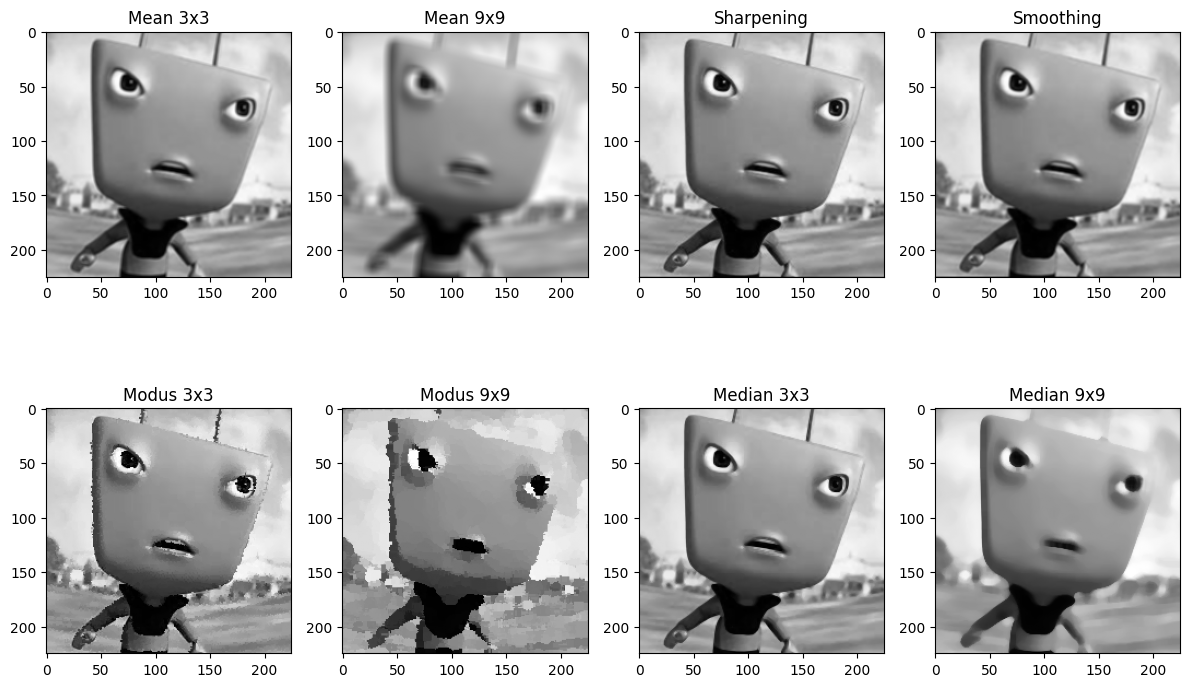

In [9]:
Mean1 = FilterMean(grayImage,3,3)
Mean2 = FilterMean(grayImage,9,9)

Modus1 = FilterModus(grayImage,3,3)
Modus2 = FilterModus(grayImage,9,9)

Median1 = FilterMedian(grayImage,3,3)
Median2 = FilterMedian(grayImage,9,9)

kernelSharp = np.array([[1/9,1/9,1/9],
						[1/9,8/9,1/9],
						[1/9,1/9,1/9]])
kernelSmooth = np.array([[1/10,1/10,1/10],
						[1/10,1/5,1/10],
						[1/10,1/10,1/10]])

smooth = FilterKonvolusi(grayImage, kernelSmooth)
sharp = FilterKonvolusi(grayImage, kernelSharp)

plt.figure(figsize=(12, 8))
plt.subplot(2,4,1)
plt.title('Mean 3x3')
plt.imshow(Mean1, cmap="gray")

plt.subplot(2,4,2)
plt.title('Mean 9x9')
plt.imshow(Mean2, cmap="gray")

plt.subplot(2,4,3)
plt.title('Sharpening')
plt.imshow(sharp, cmap="gray")

plt.subplot(2,4,4)
plt.title('Smoothing')
plt.imshow(smooth, cmap="gray")

plt.subplot(2,4,5)
plt.title('Modus 3x3')
plt.imshow(Modus1, cmap="gray")

plt.subplot(2,4,6)
plt.title('Modus 9x9')
plt.imshow(Modus2, cmap="gray")

plt.subplot(2,4,7)
plt.title('Median 3x3')
plt.imshow(Median1, cmap="gray")

plt.subplot(2,4,8)
plt.title('Median 9x9')
plt.imshow(Median2, cmap="gray")

plt.tight_layout()

Kode ini mengimplementasikan deteksi tepi menggunakan operator Sobel pada citra yang telah diproses dengan berbagai filter. Sobel filter digunakan untuk mendeteksi perubahan intensitas citra baik pada arah horizontal (`sobel_x`) maupun vertikal (`sobel_y`). Kedua filter ini diterapkan pada citra yang telah melalui berbagai metode filtering sebelumnya, seperti Mean, Modus, Median, Sharpening, dan Smoothing.

Setelah konvolusi dengan kernel Sobel di kedua arah, magnitudo tepi dihitung dengan rumus Pythagoras untuk mendapatkan kekuatan tepi pada setiap piksel. Hasil deteksi tepi ditampilkan pada 8 subplot yang menunjukkan tepi yang terdeteksi pada citra hasil dari masing-masing filter. Visualisasi ini memungkinkan perbandingan antara pengaruh setiap jenis filter terhadap hasil deteksi tepi Sobel.


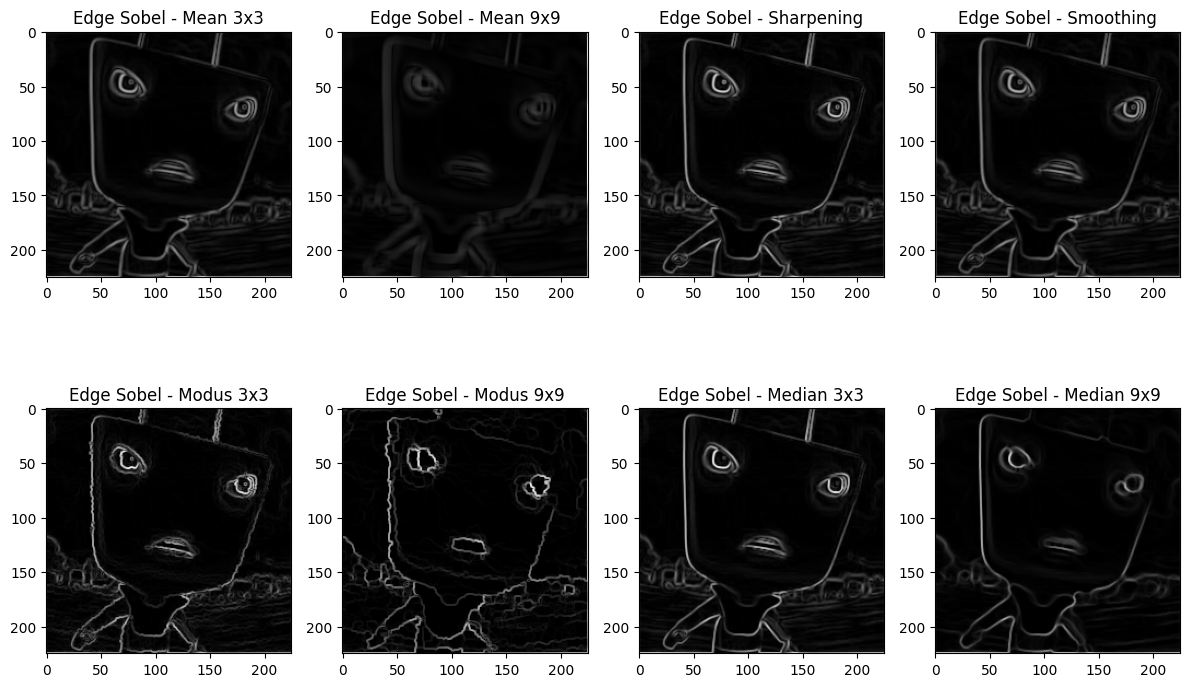

In [10]:
def sobelDetection(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    edge_x = FilterKonvolusi(image, sobel_x)
    edge_y = FilterKonvolusi(image, sobel_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)

    return edge_magnitude

sobelMean1 = sobelDetection(Mean1)
sobelMean2 = sobelDetection(Mean2)
sobelSharp = sobelDetection(sharp)
sobelSmooth = sobelDetection(smooth)
sobelModus1 = sobelDetection(Modus1)
sobelModus2 = sobelDetection(Modus2)
sobelMedian1 = sobelDetection(Median1)
sobelMedian2 = sobelDetection(Median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Edge Sobel - Mean 3x3')
plt.imshow(sobelMean1, cmap="gray")

plt.subplot(2, 4, 2)
plt.title('Edge Sobel - Mean 9x9')
plt.imshow(sobelMean2, cmap="gray")

plt.subplot(2, 4, 3)
plt.title('Edge Sobel - Sharpening')
plt.imshow(sobelSharp, cmap="gray")

plt.subplot(2, 4, 4)
plt.title('Edge Sobel - Smoothing')
plt.imshow(sobelSmooth, cmap="gray")

plt.subplot(2, 4, 5)
plt.title('Edge Sobel - Modus 3x3')
plt.imshow(sobelModus1, cmap="gray")

plt.subplot(2, 4, 6)
plt.title('Edge Sobel - Modus 9x9')
plt.imshow(sobelModus2, cmap="gray")

plt.subplot(2, 4, 7)
plt.title('Edge Sobel - Median 3x3')
plt.imshow(sobelMedian1, cmap="gray")

plt.subplot(2, 4, 8)
plt.title('Edge Sobel - Median 9x9')
plt.imshow(sobelMedian2, cmap="gray")

plt.tight_layout()
plt.show()


Kode ini mengimplementasikan deteksi tepi menggunakan operator Prewitt pada citra yang telah diproses dengan berbagai filter. Filter Prewitt berfungsi untuk mendeteksi perubahan intensitas citra baik pada arah horizontal (`prewitt_x`) maupun vertikal (`prewitt_y`). Seperti pada Sobel, setelah konvolusi dengan kernel Prewitt, magnitudo tepi dihitung dengan rumus Pythagoras untuk mendapatkan kekuatan tepi pada setiap piksel.

Hasil deteksi tepi menggunakan filter Prewitt diterapkan pada citra yang telah diproses sebelumnya dengan berbagai filter seperti Mean, Modus, Median, Sharpening, dan Smoothing. Setiap hasil deteksi tepi ditampilkan pada 8 subplot, yang memudahkan perbandingan antara pengaruh setiap teknik filter terhadap hasil deteksi tepi Prewitt.


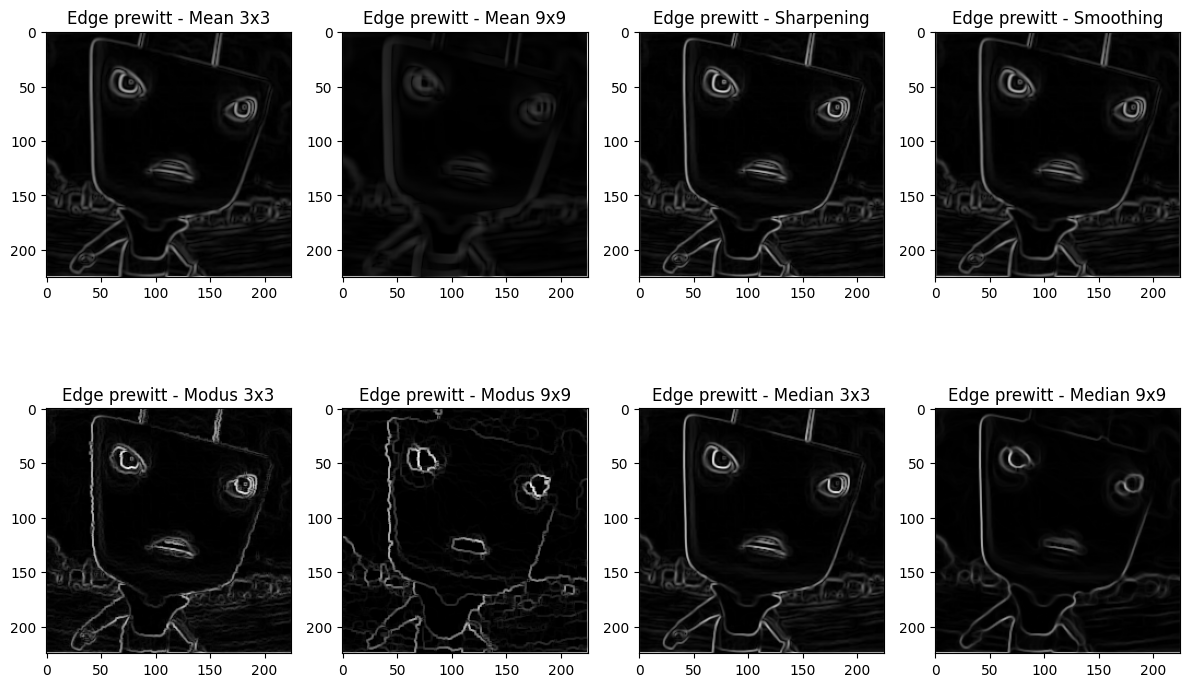

In [11]:
def prewittDetection(image):
    prewitt_x = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])

    prewitt_y = np.array([[1, 1, 1],
                        [0, 0, 0],
                        [-1, -1, -1]])

    edge_x = FilterKonvolusi(image, prewitt_x)
    edge_y = FilterKonvolusi(image, prewitt_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)

    return edge_magnitude

prewittMean1 = prewittDetection(Mean1)
prewittMean2 = prewittDetection(Mean2)
prewittSharp = prewittDetection(sharp)
prewittSmooth = prewittDetection(smooth)
prewittModus1 = prewittDetection(Modus1)
prewittModus2 = prewittDetection(Modus2)
prewittMedian1 = prewittDetection(Median1)
prewittMedian2 = prewittDetection(Median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Edge prewitt - Mean 3x3')
plt.imshow(prewittMean1, cmap="gray")

plt.subplot(2, 4, 2)
plt.title('Edge prewitt - Mean 9x9')
plt.imshow(prewittMean2, cmap="gray")

plt.subplot(2, 4, 3)
plt.title('Edge prewitt - Sharpening')
plt.imshow(prewittSharp, cmap="gray")

plt.subplot(2, 4, 4)
plt.title('Edge prewitt - Smoothing')
plt.imshow(prewittSmooth, cmap="gray")

plt.subplot(2, 4, 5)
plt.title('Edge prewitt - Modus 3x3')
plt.imshow(prewittModus1, cmap="gray")

plt.subplot(2, 4, 6)
plt.title('Edge prewitt - Modus 9x9')
plt.imshow(prewittModus2, cmap="gray")

plt.subplot(2, 4, 7)
plt.title('Edge prewitt - Median 3x3')
plt.imshow(prewittMedian1, cmap="gray")

plt.subplot(2, 4, 8)
plt.title('Edge prewitt - Median 9x9')
plt.imshow(prewittMedian2, cmap="gray")

plt.tight_layout()
plt.show()


Kode ini mengimplementasikan deteksi tepi menggunakan operator Robert pada citra yang telah diproses dengan berbagai filter. Filter Robert menggunakan dua kernel kecil, yaitu `robert_x` untuk mendeteksi tepi horizontal dan `robert_y` untuk mendeteksi tepi vertikal. Setelah dilakukan konvolusi dengan kedua kernel tersebut, magnitudo tepi dihitung dengan rumus Pythagoras untuk menggabungkan informasi dari kedua arah.

Setelah itu, deteksi tepi dengan operator Robert diterapkan pada citra yang telah diproses dengan berbagai teknik filter seperti Mean, Modus, Median, Sharpening, dan Smoothing. Hasilnya ditampilkan dalam bentuk 8 subplot yang memudahkan untuk membandingkan bagaimana masing-masing filter mempengaruhi deteksi tepi pada citra.


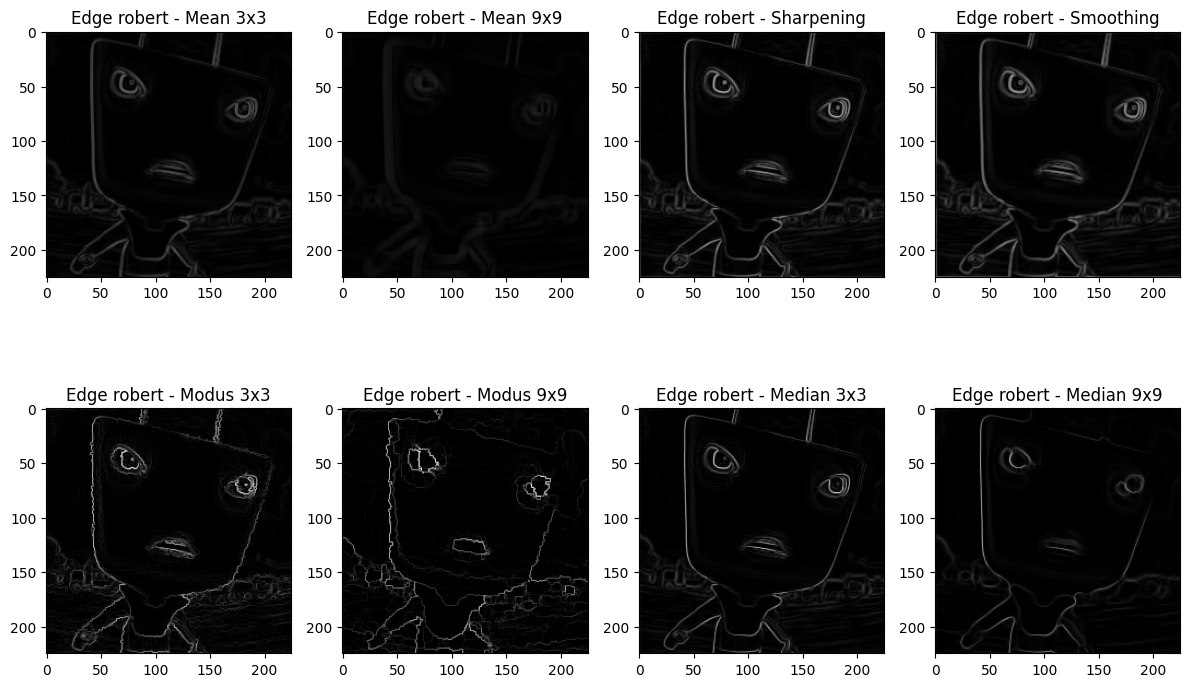

In [12]:
def robertDetection(image):
    robert_x = np.array([[1, 0],
                        [0, -1]])

    robert_y = np.array([[0, 1],
                        [-1, 0]])


    edge_x = FilterKonvolusi(image, robert_x)
    edge_y = FilterKonvolusi(image, robert_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)

    return edge_magnitude

robertMean1 = robertDetection(Mean1)
robertMean2 = robertDetection(Mean2)
robertSharp = robertDetection(sharp)
robertSmooth = robertDetection(smooth)
robertModus1 = robertDetection(Modus1)
robertModus2 = robertDetection(Modus2)
robertMedian1 = robertDetection(Median1)
robertMedian2 = robertDetection(Median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Edge robert - Mean 3x3')
plt.imshow(robertMean1, cmap="gray")

plt.subplot(2, 4, 2)
plt.title('Edge robert - Mean 9x9')
plt.imshow(robertMean2, cmap="gray")

plt.subplot(2, 4, 3)
plt.title('Edge robert - Sharpening')
plt.imshow(robertSharp, cmap="gray")

plt.subplot(2, 4, 4)
plt.title('Edge robert - Smoothing')
plt.imshow(robertSmooth, cmap="gray")

plt.subplot(2, 4, 5)
plt.title('Edge robert - Modus 3x3')
plt.imshow(robertModus1, cmap="gray")

plt.subplot(2, 4, 6)
plt.title('Edge robert - Modus 9x9')
plt.imshow(robertModus2, cmap="gray")

plt.subplot(2, 4, 7)
plt.title('Edge robert - Median 3x3')
plt.imshow(robertMedian1, cmap="gray")

plt.subplot(2, 4, 8)
plt.title('Edge robert - Median 9x9')
plt.imshow(robertMedian2, cmap="gray")

plt.tight_layout()
plt.show()


In [13]:
def bgr2gray(image):
    tinggi, lebar = image.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*image[i][j][2] + 0.5870*image[i][j][1] + 0.1140*image[i][j][0])

    return grayImg

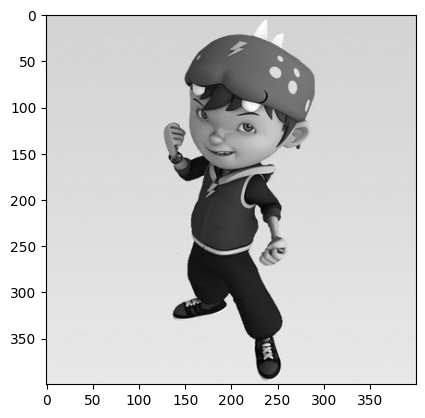

In [14]:
citraboy = plt.imread('Assets/boboiboy.jpg')
grayboy = bgr2gray(citraboy)
plt.imshow(grayboy, cmap='gray')

Kode ini menerapkan filter *Mean* 3x3 secara berulang pada gambar `grayboy` yang telah dikonversi ke grayscale. Proses dimulai dengan menerapkan filter *Mean* untuk pertama kali, kemudian gambar yang dihasilkan diproses lagi dengan filter yang sama sebanyak lima kali berturut-turut. Setiap kali filter diterapkan, gambar menjadi semakin halus karena filter *Mean* menghitung rata-rata piksel di sekitarnya, yang mengurangi detail dan noise. Hasil akhirnya adalah gambar yang semakin blur atau lebih smooth, dan ditampilkan menggunakan `plt.imshow()` dengan colormap 'gray' untuk memperlihatkan gambar dalam format grayscale.


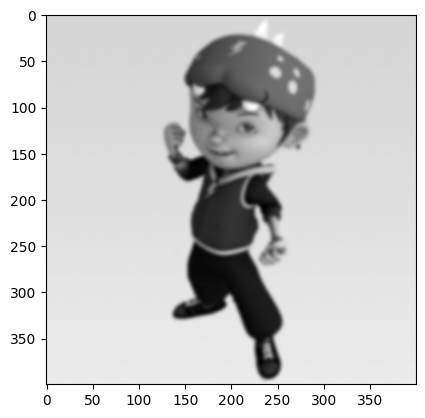

In [ ]:
meanboy = FilterMean(grayboy,3,3)
meanboy = FilterMean(meanboy,3,3)
meanboy = FilterMean(meanboy,3,3)
meanboy = FilterMean(meanboy,3,3)
meanboy = FilterMean(meanboy,3,3)
plt.imshow(meanboy, cmap='gray')

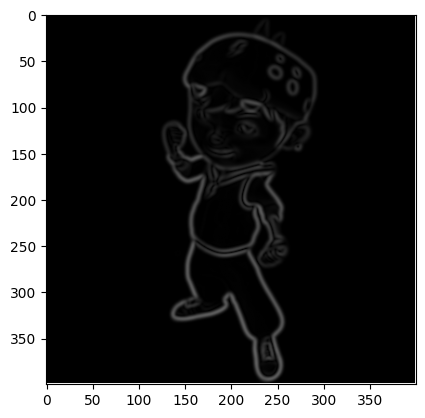

In [16]:
prewittboy = prewittDetection(meanboy)
plt.imshow(prewittboy, cmap='gray')

Fungsi `manual_threshold(image, threshold_value)` digunakan untuk mengubah gambar grayscale menjadi gambar biner dengan menerapkan threshold manual. Fungsi ini pertama-tama mendapatkan dimensi gambar (tinggi dan lebar), kemudian membuat array kosong dengan ukuran yang sama untuk menampung hasil biner. Setiap piksel dalam gambar akan diperiksa, dan jika nilai piksel tersebut lebih besar atau sama dengan nilai threshold yang diberikan (`threshold_value`), maka piksel tersebut akan diberi nilai 255 (putih), jika tidak maka diberi nilai 0 (hitam). Hasilnya adalah gambar biner yang hanya berisi dua nilai, 0 dan 255, berdasarkan perbandingan nilai piksel dengan threshold yang ditentukan. Fungsi ini berguna untuk segmentasi gambar, misalnya dalam deteksi objek atau pemisahan foreground dari background.


In [17]:
def manual_threshold(image, threshold_value):
    height, width = image.shape
    binary = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            if image[i, j] >= threshold_value:
                binary[i, j] = 255
            else:
                binary[i, j] = 0
    return binary

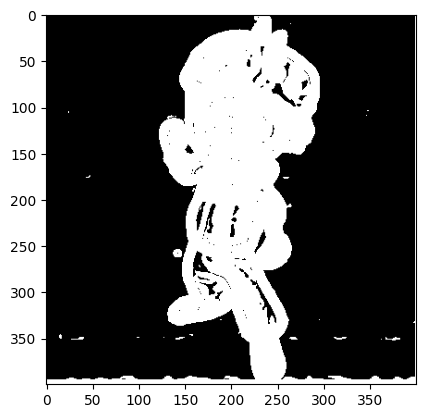

In [18]:
teshold = manual_threshold(prewittboy, 1.3)
plt.imshow(teshold, cmap='gray')

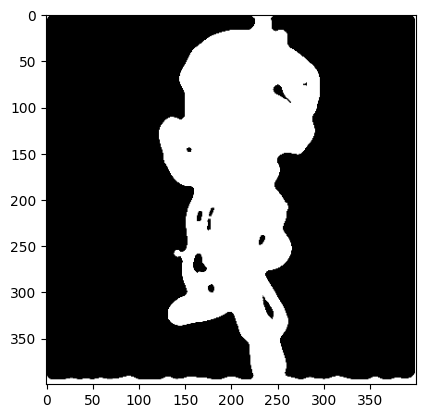

In [19]:
medianboy = FilterMedian(teshold,9,9)
plt.imshow(medianboy, cmap='grey')

Kode ini digunakan untuk memisahkan dan menampilkan tiga saluran warna (Red, Green, dan Blue) dari gambar berwarna `citraboy`. Pertama, gambar diakses dan dipisahkan menjadi tiga saluran warna menggunakan indeks array NumPy, yaitu `R` untuk saluran merah, `G` untuk saluran hijau, dan `B` untuk saluran biru. Kemudian, menggunakan `matplotlib.pyplot`, gambar ditampilkan dalam tiga subplot secara horizontal. Setiap saluran ditampilkan dengan colormap yang sesuai: 'Reds' untuk saluran merah, 'Greens' untuk saluran hijau, dan 'Blues' untuk saluran biru. Setiap saluran menunjukkan intensitas warna pada gambar, yang membantu untuk memahami bagaimana masing-masing warna berkontribusi pada gambar asli.

Text(0.5, 1.0, 'Blue Channel')

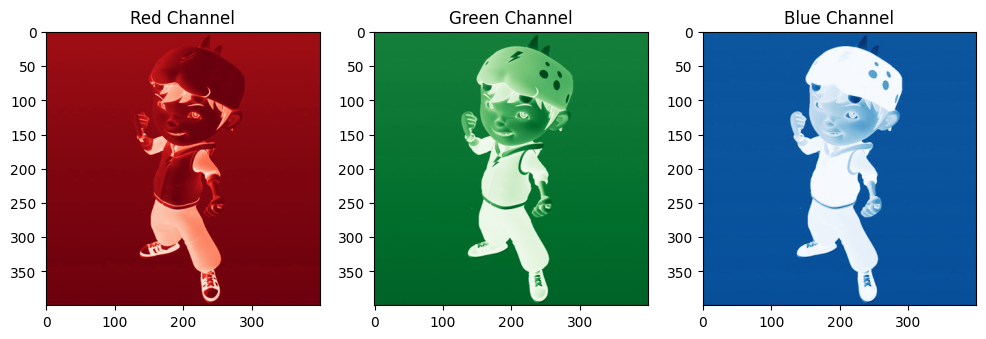

In [20]:
R, G, B = citraboy[:, :, 0], citraboy[:, :, 1], citraboy[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(R.astype(np.uint8), cmap='Reds')
plt.title("Red Channel")

plt.subplot(1, 3, 2)
plt.imshow(G.astype(np.uint8), cmap='Greens')
plt.title("Green Channel")

plt.subplot(1, 3, 3)
plt.imshow(B.astype(np.uint8), cmap='Blues')
plt.title("Blue Channel")


Kode ini melakukan operasi pengolahan citra dengan mengalikan setiap saluran warna (Red, Green, dan Blue) dari gambar `citraboy` dengan hasil dari filter median (`medianboy`). Pertama, saluran warna merah (`R`), hijau (`G`), dan biru (`B`) diambil dari gambar asli. Kemudian, masing-masing saluran tersebut dikalikan dengan citra hasil filter median (`medianboy`). Setelah itu, menggunakan `matplotlib.pyplot`, gambar yang dihasilkan dari hasil perkalian setiap saluran warna ditampilkan dalam tiga subplot secara horizontal. Setiap saluran (Red, Green, dan Blue) ditampilkan dengan colormap yang sesuai ('Reds', 'Greens', dan 'Blues'). Hasilnya akan menunjukkan perubahan intensitas warna pada citra berdasarkan operasi filter median yang diterapkan pada masing-masing saluran.


Text(0.5, 1.0, 'Blue Channel')

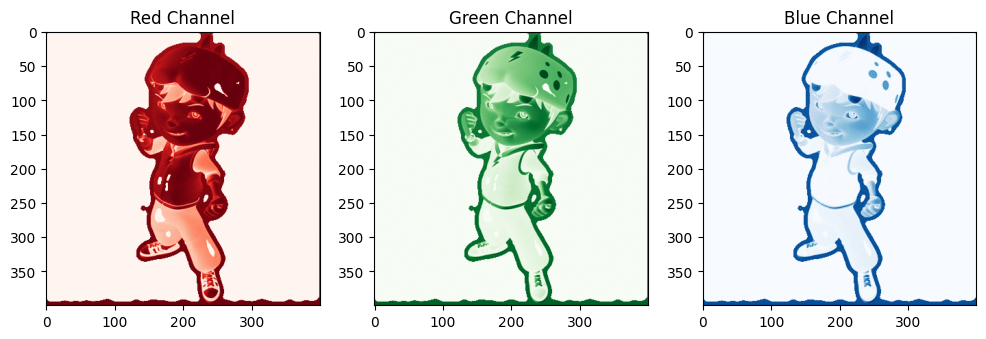

In [21]:
Rbaru = R * medianboy
Gbaru = G * medianboy
Bbaru = B * medianboy
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(Rbaru, cmap='Reds')
plt.title("Red Channel")
plt.subplot(1, 3, 2)
plt.imshow(Gbaru, cmap='Greens')
plt.title("Green Channel")
plt.subplot(1, 3, 3)
plt.imshow(Bbaru, cmap='Blues')
plt.title("Blue Channel")



Fungsi `combine` ini digunakan untuk menggabungkan tiga saluran warna (merah, hijau, dan biru) yang diproses secara terpisah menjadi gambar RGB yang utuh. Fungsi ini pertama-tama menormalkan setiap saluran warna (merah, hijau, dan biru) ke rentang \[0, 255] berdasarkan nilai minimum dan maksimum dari masing-masing saluran, kemudian mengonversi nilai tersebut menjadi tipe data `np.uint8`. Selanjutnya, jika mode yang diberikan adalah `'negatif'`, setiap saluran warna akan dibalik (nilai maksimum dikurangi dengan nilai setiap piksel), menghasilkan efek negatif pada gambar. Setelah itu, ketiga saluran warna tersebut digabungkan kembali dalam bentuk array RGB menggunakan `np.stack` untuk membentuk gambar akhir yang dapat ditampilkan.


In [22]:
def combine(red, green, blue, mode='normal'):
    red = (red - np.min(red)) / (np.max(red) - np.min(red)) * 255
    green = (green - np.min(green)) / (np.max(green) - np.min(green)) * 255
    blue = (blue - np.min(blue)) / (np.max(blue) - np.min(blue)) * 255

    red = red.astype(np.uint8)
    green = green.astype(np.uint8)
    blue = blue.astype(np.uint8)
    
    if mode == 'negatif':
        red = 255 - red
        green = 255 - green
        blue = 255 - blue
    
    rgb = np.stack((red, green, blue), axis=2)
    return rgb


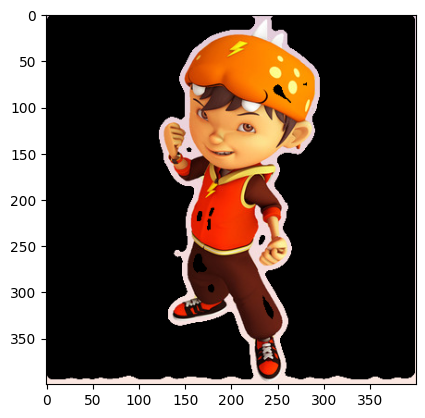

In [23]:
rgb_image = combine(Rbaru, Gbaru, Bbaru, "normal")
rgb_image = rgb_image
plt.imshow(rgb_image)

Fungsi `threshold_rgb` ini digunakan untuk memproses gambar RGB berdasarkan nilai ambang batas (threshold). Fungsi ini pertama-tama membuat salinan dari gambar RGB yang diberikan (`result = image_rgb.copy()`). Kemudian, fungsi ini mendeteksi piksel-piksel yang memiliki nilai lebih kecil dari ambang batas pada semua saluran warna (merah, hijau, dan biru) dengan menggunakan `np.all(result < threshold, axis=-1)`, yang menghasilkan sebuah masker boolean (`mask_dark`). Masker ini digunakan untuk mengganti semua piksel yang memenuhi kondisi tersebut dengan warna putih (255, 255, 255), sehingga menghasilkan efek penyaringan untuk piksel-piksel gelap. Hasil akhir adalah gambar yang memiliki piksel gelap digantikan dengan warna putih.


In [24]:
def threshold_rgb(image_rgb, threshold=40):
    result = image_rgb.copy()
    mask_dark = np.all(result < threshold, axis=-1)
    result[mask_dark] = [255, 255, 255]
    return result

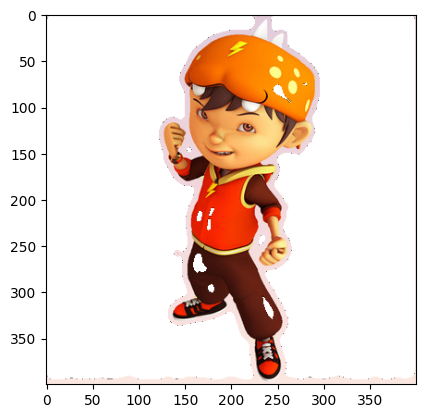

In [25]:
rgb_imagefix = threshold_rgb(rgb_image, 1)
plt.imshow(rgb_imagefix)